# Batched Bandit Problems


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from functools import partial

sns.set(rc={"figure.figsize": (11.7, 8.27)})


/home/sean/.local/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from batched_bandits.agents import (
    BatchedBernoulliThompsonAgent,
    BatchedEpsGreedyAgent,
    ABAgent,
)
from batched_bandits.experiment import BatchNumberExperiment, ArmNumberExperiment

from batched_bandits.util import (
    make_arithmetic_grid,
    make_geometric_grid,
    make_minimax_grid,
    plot_regret,
)

### Defining an Arm

Depending on the agent you use you can define the Arm to have any distribution. The Arm must have a mean and method sample that returns a single value reward as float or int.


In [3]:
class Arm:
    def __init__(self, mean):
        self.mean = mean

    def sample(self):
        # return np.random.normal(self.mean, 1)
        return np.random.binomial(1, self.mean)

## Experiments


### Experiment parameters

These are the main parameters to alter the experiment. These are my reccomendations if you're playing around

- Define your arms and then experiment for values of T and M
  - T does hit a point of diminishing returns based on your arms
  - M does not hit a point of diminishing returns, but is restricted by time line
- Experiment with different distributions for rewards
  - Eps-Greedy, BaSE, and AB are all capable of any reward function
  - Thompson Sampling would need to be rewritten to correpsond to the correct posterior solution


In [4]:
NUM_SIMS = 250
M = 8
T = 5000
STATIC_BATCH_SIZE = 8
BATCH_SIZES_TEST = [2, 4, 6, 8]
STATIC_ARM_DICT = {i: Arm(i) for i in (0.5, 0.51, 0.6)}
ARM_MEAN_TEST = (0.6, 0.5, 0.51, 0.49, 0.48, 0.52)


### Batch Number Experiment


In [5]:
test_batch_config = {
    "arm_dict": STATIC_ARM_DICT,
    "num_sims": NUM_SIMS,
    "agents_kwargs": {
        "TS": {},
        "AB": {},
        "eps_greedy": {"epsilon": 0.9, "eps_decay": 0.9},
    },
    "agent_dict": {
        "TS": partial(BatchedBernoulliThompsonAgent),
        "AB": partial(ABAgent),
        "eps_greedy": partial(BatchedEpsGreedyAgent),
    },
    "grid_dict": {
        "minimax": partial(make_minimax_grid),
        "geometric": partial(make_geometric_grid),
        "arithmetic": partial(make_arithmetic_grid),
    },
}


In [6]:
batch_exp = BatchNumberExperiment(
    m_list=BATCH_SIZES_TEST, T=T, config=test_batch_config
)


In [7]:
batch_exp.run()

/home/sean/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/sean/.local/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [ ]:
batch_exp.save_experiment()

## Arm Number Experiment


In [ ]:
test_arms_config = {
    "num_sims": NUM_SIMS,
    "agents_kwargs": {
        "TS": {},
        "AB": {},
        "eps_greedy": {"epsilon": 0.9, "eps_decay": 0.9},
    },
    "agent_dict": {
        "TS": partial(BatchedBernoulliThompsonAgent),
        "AB": partial(ABAgent),
        "eps_greedy": partial(BatchedEpsGreedyAgent),
    },
    "grid_dict": {
        "minimax": make_minimax_grid(T, M),
        "geometric": make_geometric_grid(T, M),
        "arithmetic": make_arithmetic_grid(T, M),
    },
    "arm_constructor": partial(Arm),
}

In [ ]:
arm_exp = ArmNumberExperiment(
    T=T, M=M, arm_means=ARM_MEAN_TEST, config=test_arms_config
)

In [ ]:
arm_exp.run()

/home/sean/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/sean/.local/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


KeyboardInterrupt: 

In [ ]:
arm_exp.save_experiment()

## Figures


### Batch Number Experiments


In [ ]:
df = pd.read_csv("batch_number_experiment.csv").drop("Unnamed: 0", axis=1)

#### TS Agent


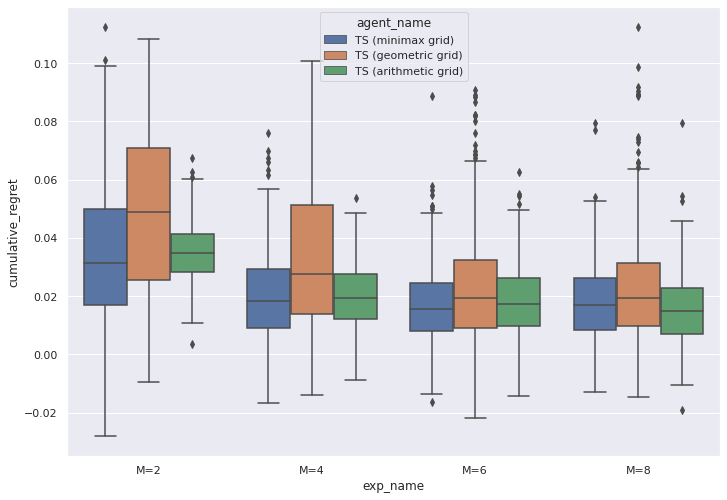

In [ ]:
plot_regret(
    df=df[
        df.agent_name.isin(
            [agent for agent in df.agent_name.unique() if "TS" in agent])
    ]
)


#### Eps-Greedy Agent


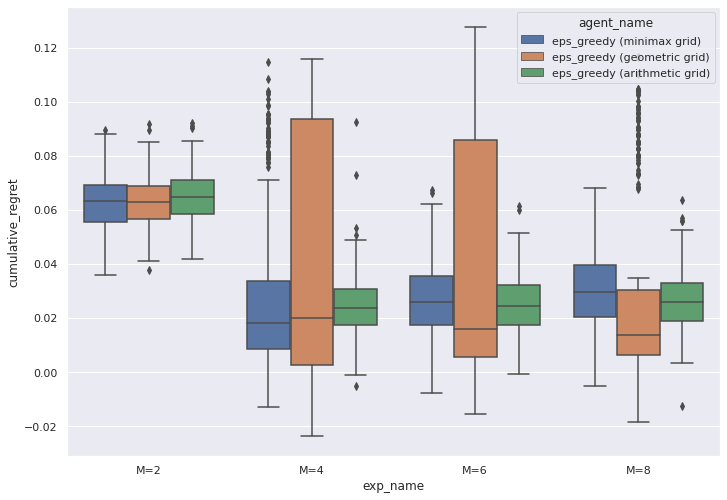

In [ ]:
plot_regret(
    df=df[
        df.agent_name.isin(
            [agent for agent in df.agent_name.unique() if "eps_greedy" in agent]
        )
    ]
)

#### AB Agent

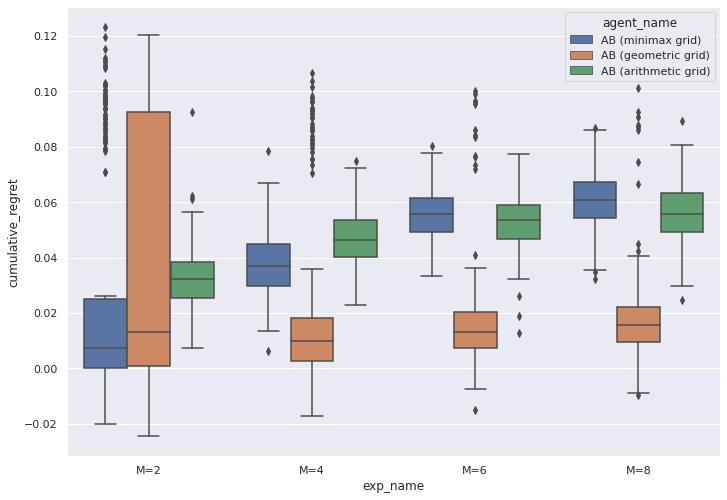

In [ ]:
plot_regret(
    df=df[
        df.agent_name.isin(
            [agent for agent in df.agent_name.unique() if "AB" in agent]
        )
    ]
)

### Arm Number Experiments


In [ ]:
df = pd.read_csv("arm_number_experiment.csv").drop("Unnamed: 0", axis=1)

#### TS

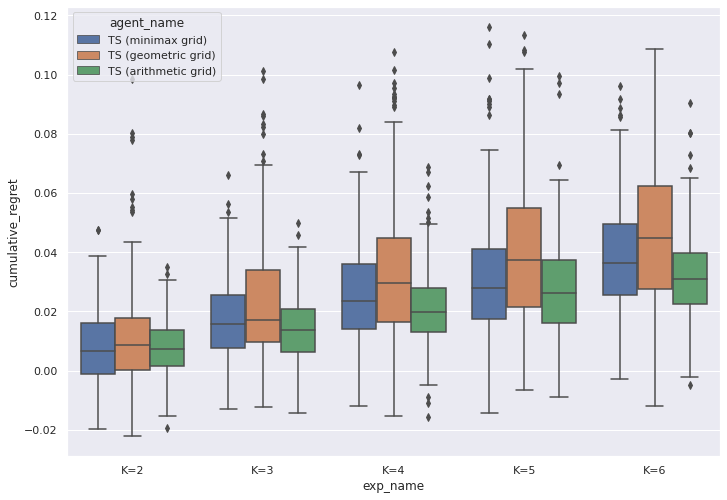

In [ ]:
plot_regret(
    df=df[
        df.agent_name.isin(
            [agent for agent in df.agent_name.unique() if "TS" in agent])
    ]
)


#### Epsilon Greedy

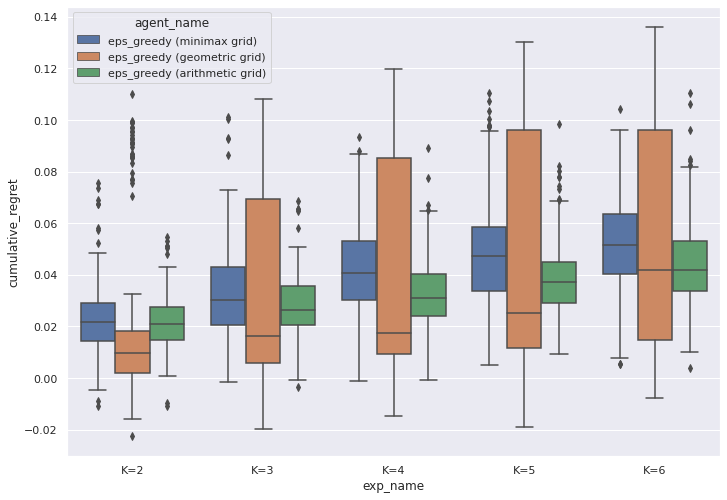

In [ ]:
plot_regret(
    df=df[
        df.agent_name.isin(
            [agent for agent in df.agent_name.unique() if "eps_greedy" in agent]
        )
    ]
)

#### AB Test

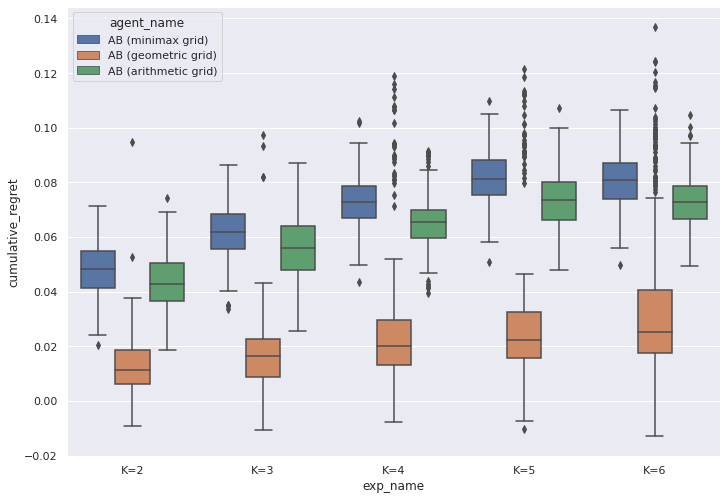

In [ ]:
plot_regret(
    df=df[
        df.agent_name.isin(
            [agent for agent in df.agent_name.unique() if "AB" in agent]
        )
    ]
)